# **Question 1:  SVM Implementation**

## Importing necessary libraries

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

### Removing warnings

In [2]:
import warnings

# To ignore all warnings:
warnings.filterwarnings("ignore")

# To ignore a specific type of warning (e.g., DeprecationWarning):
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading Dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

print(X)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [4]:
print(y)

      Class
0         1
1         1
2         1
3         1
4         1
...     ...
4596      0
4597      0
4598      0
4599      0
4600      0

[4601 rows x 1 columns]


### Checking NULL values

In [5]:
# Count null values in X
null_values_in_X = X.isnull().sum().sum()

# Count null values in y
null_values_in_y = y.isnull().sum().sum()

# Print the counts
print("Number of null values in X:", null_values_in_X)
print("Number of null values in y:", null_values_in_y)

Number of null values in X: 0
Number of null values in y: 0


### Analysis by plotting distribution

word_freq_make


<Axes: >

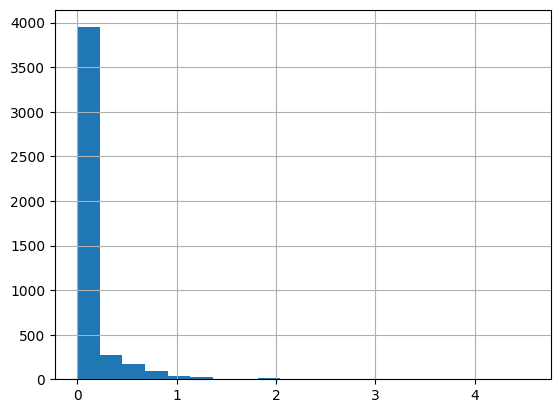

In [6]:
col = X.columns
print(col[0])
X[col[0]].hist(bins=20)

word_freq_address


<Axes: >

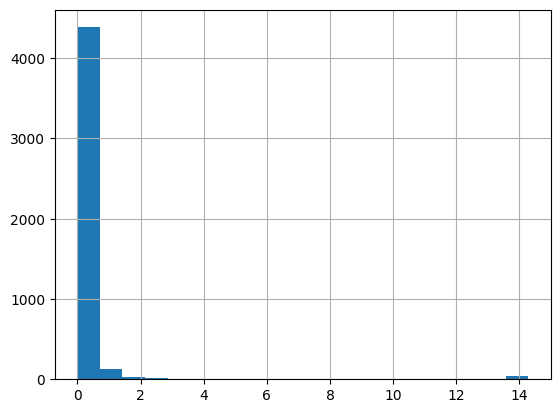

In [7]:
print(col[1])
X[col[1]].hist(bins=20)

word_freq_all


<Axes: >

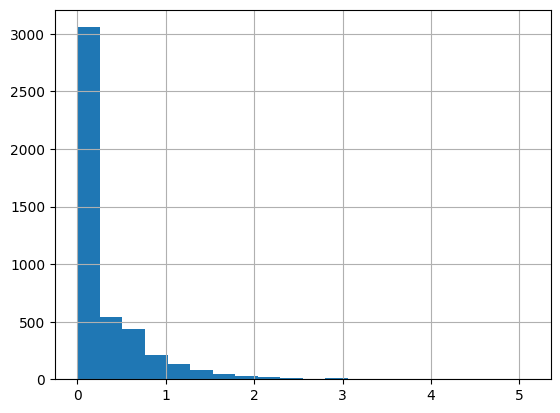

In [8]:
print(col[2])
X[col[2]].hist(bins=20)

### Printing metadata

In [9]:
# metadata
print(spambase.metadata)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

### Printing Variables

In [10]:
# variable information
print(spambase.variables)

                          name     role        type demographic  \
0               word_freq_make  Feature  Continuous        None   
1            word_freq_address  Feature  Continuous        None   
2                word_freq_all  Feature  Continuous        None   
3                 word_freq_3d  Feature  Continuous        None   
4                word_freq_our  Feature  Continuous        None   
5               word_freq_over  Feature  Continuous        None   
6             word_freq_remove  Feature  Continuous        None   
7           word_freq_internet  Feature  Continuous        None   
8              word_freq_order  Feature  Continuous        None   
9               word_freq_mail  Feature  Continuous        None   
10           word_freq_receive  Feature  Continuous        None   
11              word_freq_will  Feature  Continuous        None   
12            word_freq_people  Feature  Continuous        None   
13            word_freq_report  Feature  Continuous        Non

## **Data loading:**  

## 1.   Load the dataset and split it into training and testing set (80% for training, 20% for testing).

In [11]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42, shuffle=True)

## **Part A: SVM Implementation:**



### 1.  **Data loading:**  Load the dataset and split it into training and testing sets (80% for training,20% for testing).
### 2.   **Training the SVM:** Vectorise the data into X and y vectors for the features and the labelrespectively.  Fit the SVM model on the training data and report the accuracy.




In [ ]:
# Training the SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Report accuracy on the training set
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
print("%-20s %-5s %-15s"% ("Training Accuracy", ": ", str(train_accuracy)))
#print("Training Accuracy: " + str(train_accuracy))

# Prediction and Evaluation
y_pred = svm_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("%-20s %-5s %-15s"% ("Test Accuracy", ": ", str(accuracy)))
print("%-20s %-5s %-15s"% ("Precision", ": ",  str(precision)))
print("%-20s %-5s %-15s"% ("Recall", ": ", str(recall)))
print("%-20s %-5s %-15s"% ("F1 Score", ": ", str(f1)))
print()
# Regularization (C parameter)
C_values = [0.001, 0.1, 1, 10, 100]
accuracy_values = []
parameter_values = {'n_support': [], 'number_support_vectors': [], 'coefficients': []}

for C in C_values:
    print("For C = {}".format(C))
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    n_support = svm_model.n_support_
    number_support_vectors = len(svm_model.support_)
    coefficients = svm_model.dual_coef_

    parameter_values['n_support'].append(n_support)
    parameter_values['number_support_vectors'].append(number_support_vectors)
    parameter_values['coefficients'].append(coefficients)

# Tabularize and plot the accuracy for different C values
#for i in range(len(C_values)):
#    print("C=" + str(C_values[i]) + ": Accuracy=" + str(accuracy_values[i]))

Training Accuracy    :     0.9347826086956522
Test Accuracy        :     0.9261672095548317
Precision            :     0.9262933981871572
Recall               :     0.9261672095548317
F1 Score             :     0.9259420155636343

For C = 0.001
For C = 0.1
For C = 1
For C = 10
For C = 100


### 3.   **Prediction and Evaluation:**  Implement functions to generate predictions on the test setand calculate accuracy, precision, recall, and F1-score for the SVM model.


In [ ]:
print("")
print("%-20s %-15s" % ("C Value", "Accuracy\n"))
for i in range(len(C_values)):
    print("%-20s %-15s" % (C_values[i], str(accuracy_values[i])))

### 4.   **Regularisation:** Regularisation is necessary to overcome overfitting.  Vary the regularisationparameter of the SVM and tabularise and plot the accuracy.  You can use the following values:[ 0.001, 0.1, 1, 10, 100 ]   

In [ ]:
plt.figure()
plt.plot(C_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()

### **Optional**:  You can also observe the changes in the parameter values (by observing the mean,maximum, etc.)  as the value of the regularisation parameter is changed.

In [ ]:
# Tabularize and plot parameter values for different C values
print("%-10s %-15s %-15s %-25s" % ("C", "n_support", "Number of SVs", "Coefficients (1st 5)\n"))
for i in range(len(C_values)):
    # Convert coefficients to a string
    coefficients = parameter_values['coefficients'][i][0][:5]
    #print(coefficients)
    coefficients_str = str(coefficients)

    print("%-10s %-15s %-15s %-25s" % (C_values[i], parameter_values["n_support"][i], parameter_values["number_support_vectors"][i], coefficients_str))

plt.figure()
plt.plot(C_values, parameter_values['n_support'], marker='o', label='n_support')
plt.plot(C_values, parameter_values['number_support_vectors'], marker='o', label='Number of Support Vectors')
plt.title('Parameter Values vs. Regularization Parameter (C)')
plt.xlabel('C')
plt.ylabel('Parameter Value')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

## **Part B: Kernel Tricks**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler
scaler_PartB = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled_PartB = scaler_PartB.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train_PartB, X_test_PartB, y_train_PartB, y_test_PartB = train_test_split(X_scaled_PartB, y,test_size=0.2, random_state=42, shuffle=True)

### In this part of the assignment, we will observe the impact of various kernels on the performance of the model.
### Report the **accuracy, precision, recall and F1 score** on the **test set** using the following kernels:
### 1.  Polynomial with degree 2
### 2.  Polynomial with degree 3
### 3.  Sigmoid
### 4.  Radial Basis Function (RBF)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, None, None]

results = []

for kernel, degree in zip(kernels, degrees):
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=degree)
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train_PartB, y_train_PartB)
    y_pred_PartB = model.predict(X_test_PartB)

    accuracy = accuracy_score(y_test_PartB, y_pred_PartB)
    precision = precision_score(y_test_PartB, y_pred_PartB)
    recall = recall_score(y_test_PartB, y_pred_PartB)
    f1 = f1_score(y_test_PartB, y_pred_PartB)

    results.append({
        'Kernel': kernel,
        'Degree': degree if degree else 'N/A',
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2)
    })

print("%-15s %-15s %-15s %-15s %-15s %-15s" % ("Kernel", "Degree", "Accuracy", "Precision", "Recall", "F1 Score"))
print()
# Print or store the results
for result in results:
    print("%-15s %-15s %-15s %-15s %-15s %-15s" % (result["Kernel"], result["Degree"], result["Accuracy"], result["Precision"], result["Recall"], result["F1 Score"]))


## **Part C: Overfitting & Underfitting Analysis**

### In this part, we will explore the **impact of kernel complexity and regularization in SVMs on model performance**, and the presence of underfitting or overfitting.

### 1.  Reuse training and testing datasets from Part A.
### 2.  Train SVM models with **different degrees of the polynomial kernel and different 'C'** values as mentioned in Table 1,


  <table style="width:60%; font-size:15px;">
  <tr>
    <th>Experiment</th>
    <th>Polynomial Degree</th>
    <th>Regularization Parameter 'C'</th>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0.01</td>
  </tr>
  <tr>
    <td>2</td>
    <td>1</td>
    <td>100</td>
  </tr>
  <tr>
    <td>3</td>
    <td>3</td>
    <td>0.01</td>
  </tr>
  <tr>
    <td>4</td>
    <td>3</td>
    <td>100</td>
  </tr>
</table>


In [ ]:
degrees = [1, 1, 3, 3]  # Polynomial degrees
C_values = [0.01, 100, 0.01, 100]  # Regularization parameters

# Create dictionaries to store accuracy results for train and test sets
train_accuracy_results = {}
test_accuracy_results = {}
results = {}
for i in range(len(degrees)):
    results[degrees[i]]=[]
# Loop over different degrees and C values
for i in range(len(degrees)):
        # Create and train the SVM model with the specified degree and C
        svm_model = SVC(kernel='poly', degree=degrees[i], C=C_values[i])
        svm_model.fit(X_train_PartB, y_train_PartB)

        # Calculate accuracy on the train and test sets
        train_accuracy = svm_model.score(X_train_PartB, y_train_PartB)
        test_accuracy = svm_model.score(X_test_PartB, y_test_PartB)
        results[degrees[i]].append([C_values[i], round(train_accuracy, 2), round(test_accuracy, 2)])
        # Store the results in the dictionaries
        train_accuracy_results[(degrees[i], C_values[i])] = train_accuracy
        test_accuracy_results[(degrees[i], C_values[i])] = test_accuracy

# Tabulate the results (you can use a more elaborate table library for this)
print("Degree   C       Train Accuracy  Test Accuracy")
print()
for (degree, C), train_accuracy in train_accuracy_results.items():
    test_accuracy = test_accuracy_results[(degree, C)]
    print("%-6s   %-6s  %.2f           %.2f" % (degree, C, train_accuracy, test_accuracy))

### Ploting and tabulating the test and train accuracy to showcase overfitting and underfitting.

In [ ]:
for degree in results:
    c=[]
    train=[]
    test=[]
    for val in results[degree]:
        #print(degree, val[0], val[1], val[2])
        c.append(val[0])
        train.append(val[1])
        test.append(val[2])
    plt.figure()
    plt.plot(c, train, marker='o', label='Train Accuracy')
    plt.plot(c, test, marker='o', label='Test Accuracy')
    plt.title('For Polynomial of Degree {} Accuracy vs. Regularization Parameter (C)'.format(degree))
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()